In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns

In [21]:
data = pd.read_csv('^CSE.csv' , date_parser=True)

In [22]:
data.isnull().sum()

Date           0
Open         439
High         439
Low          439
Close        439
Adj Close    439
Volume       439
dtype: int64

In [23]:
data = data.dropna()

In [45]:
# here we are printing shape of data
data.shape

(5510, 7)

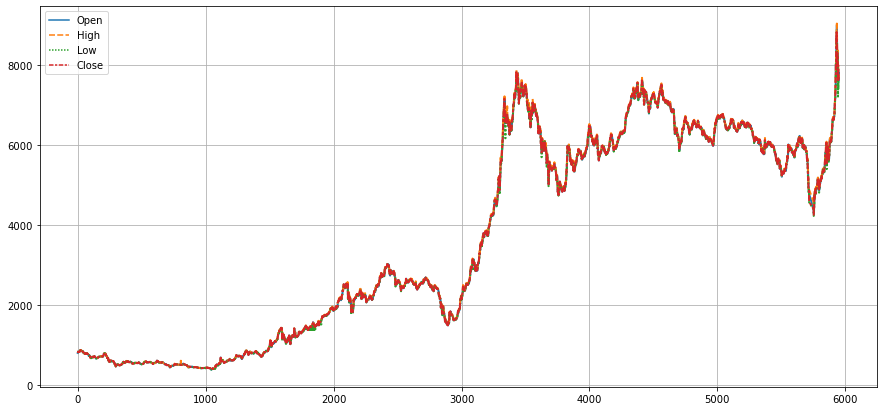

In [55]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data[['Open', 'High', 'Low','Close']],linewidth=2)
plt.grid(True)
plt.show()

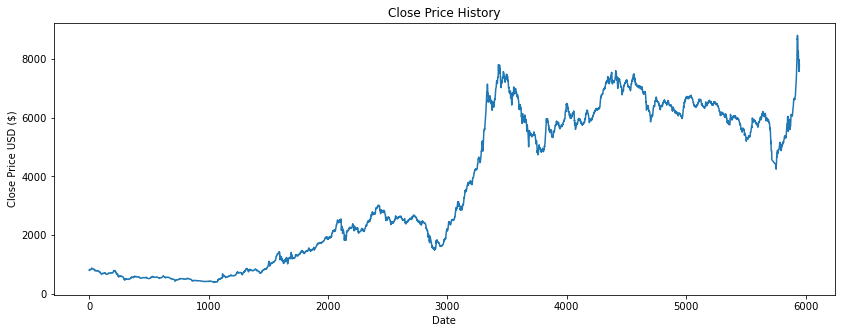

In [44]:
# here we are Visualising the closing price history
plt.figure(figsize=(14,5))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

Create a new data frame with only the closing price and convert it to an array. Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [27]:
#Creating a new dataframe with only the 'Close' column
df = data.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = df.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

4408

Now scale the data set to be values between 0 and 1 inclusive, I do this because it is generally good practice to scale your data before giving it to the neural network.

In [28]:
# here we are Scaling the all of the data to be values between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.04924442],
       [0.05005119],
       [0.05070374],
       ...,
       [0.85481879],
       [0.87238049],
       [0.87968661]])

In [29]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.04924442, 0.05005119, 0.05070374, 0.05276815, 0.05196137,
       0.05140374, 0.05187832, 0.05219866, 0.05202069, 0.05179526,
       0.05149865, 0.05186645, 0.0526495 , 0.05294611, 0.05408747,
       0.05432238, 0.05465458, 0.05527153, 0.05655289, 0.05769188,
       0.05722916, 0.05603086, 0.05683764, 0.05620171, 0.05612577,
       0.05542577, 0.05556814, 0.05585289, 0.05543764, 0.05522408,
       0.05521221, 0.05490374, 0.05399018, 0.05332578, 0.05302917,
       0.05339696, 0.05416815, 0.05357493, 0.05241221, 0.05117831,
       0.05022916, 0.04868679, 0.04841391, 0.04961221, 0.05059696,
       0.04974272, 0.04950543, 0.04901899, 0.04853255, 0.04777323,
       0.04666984, 0.04735797, 0.04823594, 0.0486156 , 0.04809357,
       0.04795119, 0.04735797, 0.04735797, 0.04681221, 0.04703764])]
[0.04664610782238048]

[array([0.04924442, 0.05005119, 0.05070374, 0.05276815, 0.05196137,
       0.05140374, 0.05187832, 0.05219866, 0.05202069, 0.05179526,
       0.05149865, 0.05186645, 0.05

In [30]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout

In [33]:
#now we are Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [34]:
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4348/4348 [==============================] - 76s 17ms/step - loss: 8.3466e-04


In [36]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [37]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

In [38]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [39]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [40]:
# here we are calculaing the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

100.77324520473404

C:\Users\Aadhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


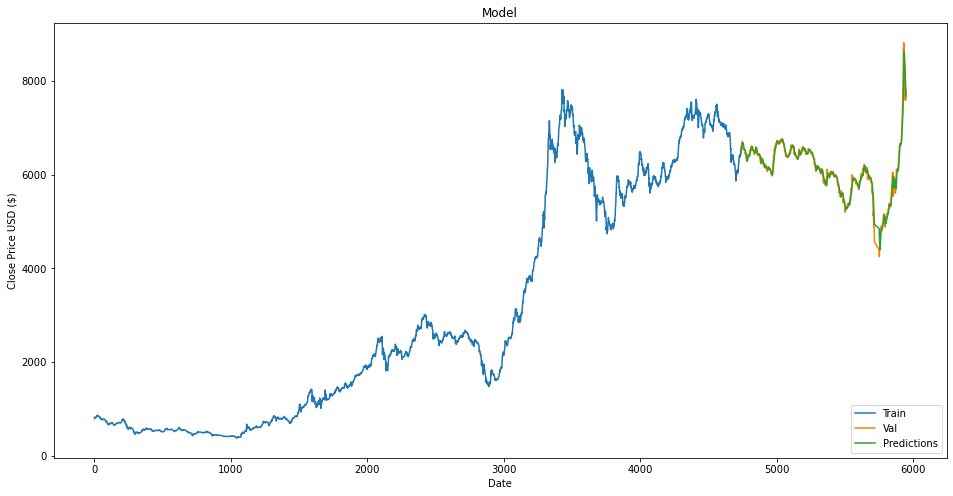

In [42]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
print(valid)

            Date         Open         High          Low        Close  \
4741  2016-05-04  6585.399902  6608.549805  6556.709961  6568.850098   
4742  2016-05-05  6568.729980  6587.270020  6552.390137  6578.339844   
4743  2016-05-06  6581.430176  6599.180176  6578.339844  6592.450195   
4744  2016-05-09  6595.299805  6605.899902  6592.399902  6594.799805   
4745  2016-05-10  6594.669922  6647.839844  6593.689941  6637.740234   
...          ...          ...          ...          ...          ...   
5944  2021-02-12  7710.979980  7995.620117  7597.810059  7985.000000   
5945  2021-02-16  7891.270020  7907.270020  7554.790039  7580.910156   
5946  2021-02-17  7589.779785  7655.979980  7385.930176  7588.339844   
5947  2021-02-18  7668.919922  7775.669922  7588.339844  7736.359863   
5948  2021-02-19  7784.870117  7821.390137  7687.580078  7797.939941   

        Adj Close       Volume  Predictions  
4741  6568.850098   35264900.0  6472.232422  
4742  6578.339844   33592100.0  6499.769043